## Building a Digit Recognitio Model

Handwritten digit recognition is the process to provide the ability to machines to recognize human handwritten digits

### Getting the dataset

In [4]:
from sklearn import datasets
digits = datasets.load_digits()
print('digits.images: ' + str(digits.images.shape))
print('digits.target: '+ str(digits.target.shape))

digits.images: (1797, 8, 8)
digits.target: (1797,)


In [5]:
# first digit looks like(numerical form)
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

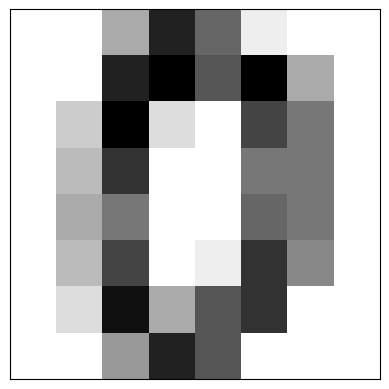

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, 
               labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [8]:
# Let's see its label
digits.target[0]

0

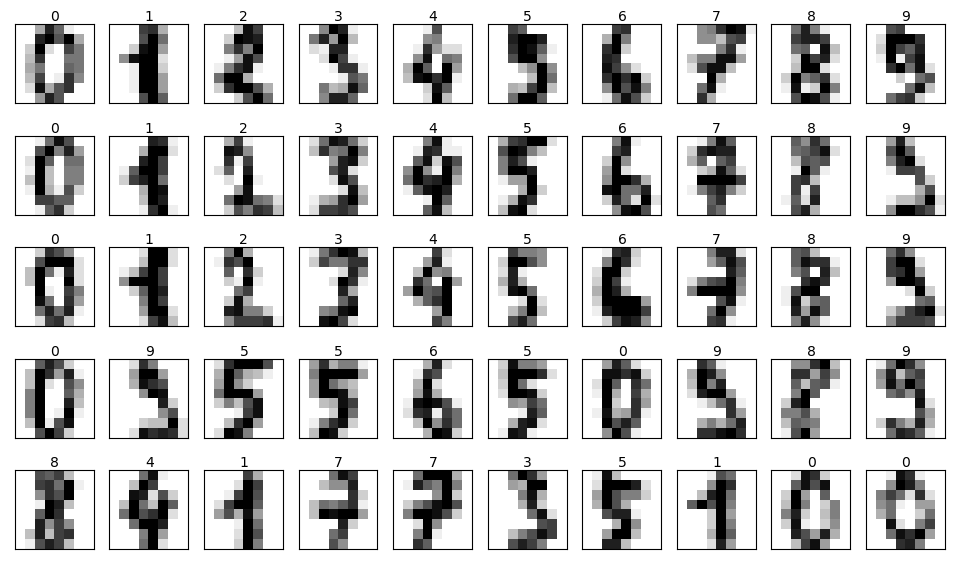

In [10]:
# Plotting the first 50 images and show the coreesponding labels.

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
 
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

### Getting the distribution of the samples.

As we can see the dataset is almost perfectly balanced

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

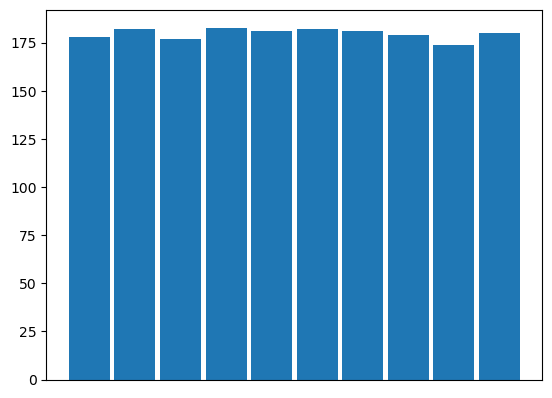

In [11]:
plt.xticks([])
plt.hist(digits.target, rwidth=0.9)

### Split the dataset into training and test dataset

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
 
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [14]:
# Getting the score of the trained model

model.score(x_test, y_test)

0.9583333333333334

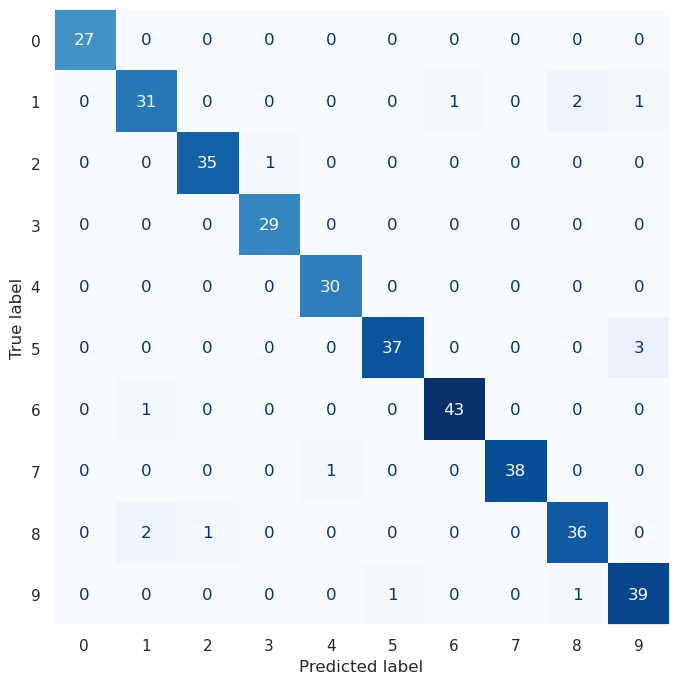

In [15]:
# Using a confusion matrix to see how the model performs on the test dataset.

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8,8))
ax.grid(False)
cmd.from_estimator(model, x_test, y_test, cmap='Blues', colorbar=False, ax=ax)

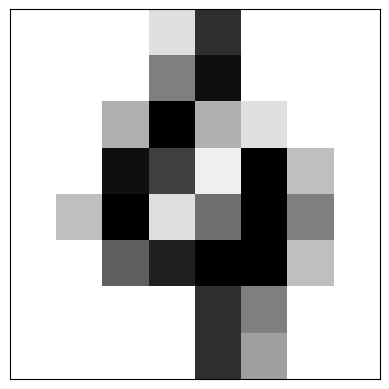

In [16]:
sns.reset_orig()
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False,
               labelleft=False)
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)

### Getting predictions from the model

In [19]:
# let's pass the image to model to predict
model.predict([digits.data[100]])[0]

4

In [20]:
# probability that the image is 4
model.predict_proba([digits.data[100]])

array([[5.81994916e-11, 4.62093683e-09, 9.06283476e-21, 2.98438785e-22,
        9.99999988e-01, 1.10772531e-15, 7.27731172e-09, 1.40526087e-10,
        2.68312480e-12, 4.92855514e-22]])

In [21]:
model.predict_proba([digits.data[100]])[0][4]

0.9999999879003415